## Ridge regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đường số 5,Street Name_Ấp Bắc,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399426,4.008825,10.000000,2.236068,0.111790,4,4,5.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.400602,4.003590,10.000000,2.236068,0.111790,4,5,6.0,270000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.399521,4.008289,8.660254,2.236068,-1.269336,4,6,4.0,280000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
3,10.400602,3.996527,12.369317,2.236068,2.874041,1,1,5.0,415000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,10.400601,3.996523,11.832160,2.236068,2.321591,1,1,6.0,450000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


##### Input variables

- Training set

In [4]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,Ward Name_Phường An Hải Bắc,Ward Name_Phường An Hải Tây,Ward Name_Phường An Hải Đông,...,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đường số 5,Street Name_Ấp Bắc,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399426,4.008825,10.000000,2.236068,0.111790,4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.400602,4.003590,10.000000,2.236068,0.111790,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.399521,4.008289,8.660254,2.236068,-1.269336,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
3,10.400602,3.996527,12.369317,2.236068,2.874041,1,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,10.400601,3.996523,11.832160,2.236068,2.321591,1,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


##### Target variables

- Training set

In [5]:
y = df[['Price']]
y.head()

,Price
0,250000000
1,270000000
2,280000000
3,415000000
4,450000000


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(1820, 1153) (456, 1153)
(1820, 1) (456, 1)


#### Select Alpha coefficient

In [7]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 6.550670653717312e+17
model ridge_0.1, MSE: 6.122315930787602e+17
model ridge_0.15, MSE: 5.950460051661864e+17
model ridge_0.2, MSE: 5.859060041527812e+17
model ridge_0.25, MSE: 5.804638350662519e+17
model ridge_0.3, MSE: 5.77113552037187e+17
model ridge_0.35, MSE: 5.751058357083382e+17
model ridge_0.4, MSE: 5.740325423449839e+17
model ridge_0.45, MSE: 5.7364587453533606e+17
model ridge_0.5, MSE: 5.73783097836845e+17
model ridge_0.55, MSE: 5.7433095425508435e+17
model ridge_0.6, MSE: 5.752070974158308e+17
model ridge_0.65, MSE: 5.763496143150886e+17
model ridge_0.7, MSE: 5.777107202799951e+17
model ridge_0.75, MSE: 5.79252759849903e+17
model ridge_0.8, MSE: 5.809455568782021e+17
model ridge_0.85, MSE: 5.827645933087564e+17
model ridge_0.9, MSE: 5.846897184251268e+17
model ridge_0.95, MSE: 5.867042099649996e+17
-----------------------------------------
Best models: ridge_0.95, MSE: 5.867042099649996e+17


*Vậy với Alpha 0.05 sẽ cho mô hình tối ưu nhất*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [8]:
ridge_regression = Ridge(alpha=0.95)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.95)

##### Real estate price prediction

- Prediction on validation set

In [9]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[4.33272689e+09],
       [3.07152635e+09],
       [4.40973995e+09],
       [3.76158509e+09],
       [1.09949827e+09],
       [3.82578051e+09],
       [2.47982256e+09],
       [2.40644611e+09],
       [4.89351182e+09],
       [4.08993940e+09],
       [3.18261138e+09],
       [1.89246352e+09],
       [3.30516213e+09],
       [3.43837670e+09],
       [4.69633031e+09],
       [3.23924698e+09],
       [1.61460422e+09],
       [3.68541456e+09],
       [2.87723128e+09],
       [4.13519165e+09],
       [3.16256202e+09],
       [3.57644552e+09],
       [3.85962654e+09],
       [3.01556458e+09],
       [3.83052110e+09],
       [2.69148457e+09],
       [5.38285588e+09],
       [5.38023304e+09],
       [3.45172676e+09],
       [4.54883932e+09],
       [2.14551247e+09],
       [4.09341498e+09],
       [5.32028395e+09],
       [1.98752769e+09],
       [6.44609483e+09],
       [3.32787941e+09],
       [4.74805680e+09],
       [6.40209183e+09],
       [3.40815932e+09],
       [5.29814214e+09],


- On the train set

In [10]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[2.31792394e+09],
       [2.39208647e+09],
       [3.50766263e+09],
       ...,
       [4.11831782e+09],
       [4.51998328e+09],
       [3.33437919e+09]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [11]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 2.6141891764284374e+17
R-squared of Ridge Model: 88.18035054606177
MAPE of Ridge Model: Price    14.124342
dtype: float64


- Evaluation on the Validation set

In [12]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 5.867042099649996e+17
R-squared of Ridge Model: 73.84655335250638
MAPE of Ridge Model: Price    19.644785
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

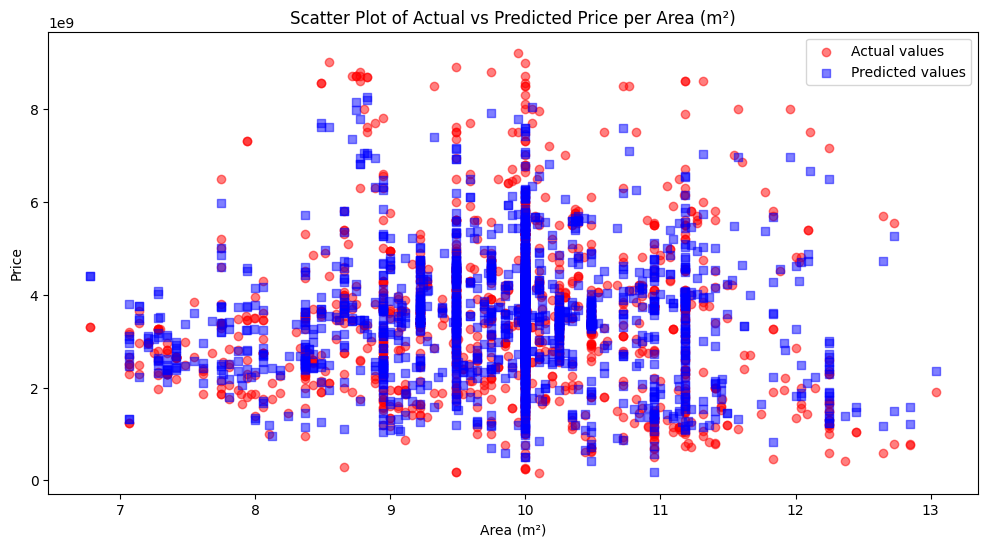

In [13]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

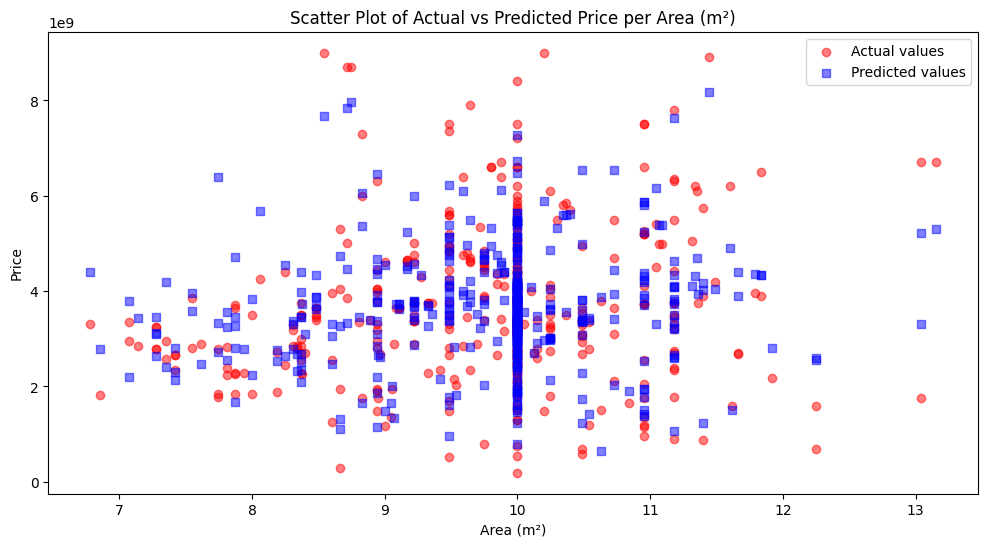

In [14]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>